# Top 5 Nations with Highest Internal Displacement Due to Natural Disaster, in Comparison with Global Rates

In [1]:
%pip install wbdata 
import pandas as pd
import wbdata
import numpy as np
from matplotlib import animation as ani

  Using cached wbdata-0.3.0-py3-none-any.whl (14 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
wbdata.get_source()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

In [122]:
disp_stat = wbdata.get_dataframe({'VC.IDP.NWDS':'Internally displaced persons, new displacement associated with disasters (number of cases)'})
#top_five = disp_stat.groupby("country").sort_values("Internally displaced persons, new displacement associated with disasters (number of cases)", ascending=False)
disp_stat.head(50)

Internally displaced persons, new displacement associated with disasters (number of cases)
country                     date                                                                                            
Africa Eastern and Southern 2022                                          4296440.0                                         
                            2021                                          2338890.0                                         
                            2020                                          3585560.0                                         
                            2019                                          2727102.0                                         
                            2018                                          1810544.0                                         
                            2017                                          2179294.0                                         
                            2016                                           873020.0                                         
                            2015                                           905597.0                                         
                            2014                                           579067.0                                         
                            2013                                          1065100.0                                         
                            2012                                           910420.0                                         
                            2011                                           495700.0                                         
                            2010                                           463750.0                                         
                            2009                                                NaN                                         
                            2008                                           517600.0                                         
                            2007                                                NaN                                         
                            2006                                                NaN                                         
                            2005                                                NaN                                         
                            2004                                                NaN                                         
                            2003                                                NaN                                         
                            2002                                                NaN                                         
                            2001                                                NaN                                         
                            2000                                                NaN                                         
                            1999                                                NaN                                         
                            1998                                                NaN                                         
                            1997                                                NaN                                         
                            1996                                                NaN                                         
                            1995                                                NaN                                         
                            1994                                                NaN                                         
                            1993                                                NaN                                         
                            1992  

In [123]:
new_df = disp_stat.reset_index()
new_df

,country,date,"Internally displaced persons, new displacement associated with disasters (number of cases)"
0,Africa Eastern and Southern,2022,4296440.0
1,Africa Eastern and Southern,2021,2338890.0
2,Africa Eastern and Southern,2020,3585560.0
3,Africa Eastern and Southern,2019,2727102.0
4,Africa Eastern and Southern,2018,1810544.0
...,...,...,...
16753,Zimbabwe,1964,NaN
16754,Zimbabwe,1963,NaN
16755,Zimbabwe,1962,NaN
16756,Zimbabwe,1961,NaN


In [124]:
disp_stat_tbl= new_df.groupby("country").apply(sum).drop(["country","date"], axis=1).sort_values("Internally displaced persons, new displacement associated with disasters (number of cases)", ascending=False)
disp_stat_tbl.head(30)

,"Internally displaced persons, new displacement associated with disasters (number of cases)"
country,
World,375928016.0
Low & middle income,353416369.0
IDA & IBRD total,350508163.0
Middle income,326863046.0
IBRD only,250758876.0
Lower middle income,196602011.0
Early-demographic dividend,194082969.0
East Asia & Pacific,187423617.0
East Asia & Pacific (excluding high income),182160023.0


In [113]:
index_aggregated_top_five_rates=[0,15,17,19,29,33]
top_five_tbl=disp_stat_tbl.iloc[index_aggregated_top_five_rates]
top_five_tbl

,"Internally displaced persons, new displacement associated with disasters (number of cases)"
country,
World,375928016.0
China,96677000.0
Philippines,59574000.0
India,55923000.0
Pakistan,24753700.0
Bangladesh,17045000.0


## For this project's topic, we will be pulling from Source 2: Worldwide Development Indicators 

In [5]:
SOURCE=2 
wbdata.get_indicator(source=SOURCE)

id                         name
-------------------------  ---------------------------------------------------------------------------------------------------------------------------------------------
AG.AGR.TRAC.NO             Agricultural machinery, tractors
AG.CON.FERT.PT.ZS          Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS             Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2             Agricultural land (sq. km)
AG.LND.AGRI.ZS             Agricultural land (% of land area)
AG.LND.ARBL.HA             Arable land (hectares)
AG.LND.ARBL.HA.PC          Arable land (hectares per person)
AG.LND.ARBL.ZS             Arable land (% of land area)
AG.LND.CREL.HA             Land under cereal production (hectares)
AG.LND.CROP.ZS             Permanent cropland (% of land area)
AG.LND.EL5M.RU.K2          Rural land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.RU.ZS          Rural land area where elevation is below 5 me

In [7]:
disp_stat = wbdata.get_dataframe({'VC.IDP.NWDS':'Internally displaced persons, new displacement associated with disasters (number of cases)'})
#top_five = disp_stat.groupby("country").sort_values("Internally displaced persons, new displacement associated with disasters (number of cases)", ascending=False)
disp_stat.head(50)

Internally displaced persons, new displacement associated with disasters (number of cases)
country                     date                                                                                            
Africa Eastern and Southern 2022                                          4296440.0                                         
                            2021                                          2338890.0                                         
                            2020                                          3585560.0                                         
                            2019                                          2727102.0                                         
                            2018                                          1810544.0                                         
                            2017                                          2179294.0                                         
                            2016                                           873020.0                                         
                            2015                                           905597.0                                         
                            2014                                           579067.0                                         
                            2013                                          1065100.0                                         
                            2012                                           910420.0                                         
                            2011                                           495700.0                                         
                            2010                                           463750.0                                         
                            2009                                                NaN                                         
                            2008                                           517600.0                                         
                            2007                                                NaN                                         
                            2006                                                NaN                                         
                            2005                                                NaN                                         
                            2004                                                NaN                                         
                            2003                                                NaN                                         
                            2002                                                NaN                                         
                            2001                                                NaN                                         
                            2000                                                NaN                                         
                            1999                                                NaN                                         
                            1998                                                NaN                                         
                            1997                                                NaN                                         
                            1996                                                NaN                                         
                            1995                                                NaN                                         
                            1994                                                NaN                                         
                            1993                                                NaN                                         
                            1992  

#### Resetting the dataframe index, so that each country and its corresponding year is a row:

In [17]:
new_df = disp_stat.reset_index()
new_df

,country,date,"Internally displaced persons, new displacement associated with disasters (number of cases)"
0,Africa Eastern and Southern,2022,4296440.0
1,Africa Eastern and Southern,2021,2338890.0
2,Africa Eastern and Southern,2020,3585560.0
3,Africa Eastern and Southern,2019,2727102.0
4,Africa Eastern and Southern,2018,1810544.0
...,...,...,...
16753,Zimbabwe,1964,NaN
16754,Zimbabwe,1963,NaN
16755,Zimbabwe,1962,NaN
16756,Zimbabwe,1961,NaN


#### This table groups each country, sums up the amount of internally displaced people per year, and sorts the rows from most to least displaced people:

In [18]:
disp_stat_tbl= new_df.groupby("country").apply(sum).drop(["country","date"], axis=1).sort_values("Internally displaced persons, new displacement associated with disasters (number of cases)", ascending=False)
disp_stat_tbl.head(30)

,"Internally displaced persons, new displacement associated with disasters (number of cases)"
country,
World,375928016.0
Low & middle income,353416369.0
IDA & IBRD total,350508163.0
Middle income,326863046.0
IBRD only,250758876.0
Lower middle income,196602011.0
Early-demographic dividend,194082969.0
East Asia & Pacific,187423617.0
East Asia & Pacific (excluding high income),182160023.0


#### Selecting the top five nations with the most aggregate internal displacement:

In [19]:
index_aggregated_top_five_rates=[0,15,17,19,29,33]
top_five_tbl=disp_stat_tbl.iloc[index_aggregated_top_five_rates]
top_five_tbl

,"Internally displaced persons, new displacement associated with disasters (number of cases)"
country,
World,375928016.0
China,96677000.0
Philippines,59574000.0
India,55923000.0
Pakistan,24753700.0
Bangladesh,17045000.0


### This function pulls internal displacement data according to Source 2 for any country, creating an individual data frame for each individual inputted country:

In [20]:
def get_country_data(country_name): 
    """select specific country's internal displacement over time from data set, reindexes the data frame, and """
    
    df = new_df.loc[new_df['country'] == country_name].reset_index().drop(["index"], axis=1)
    df = df.drop(columns = ['country'])
    df = df.rename(columns = {'Internally displaced persons, new displacement associated with disasters (number of cases)': 
                              country_name})
    return df

#top_five_visual.iplot(title="Internal Displacement Over Time",xTitle='Year',yTitle='Internal Displacement')

In [21]:
world=get_country_data('World')
china=get_country_data('China')
philippines=get_country_data('Philippines')
india=get_country_data('India')
pakistan=get_country_data('Pakistan')
bangladesh=get_country_data('Bangladesh')
bangladesh 

,date,Bangladesh
0,2022,1524000.0
1,2021,99000.0
2,2020,4443000.0
3,2019,4084000.0
4,2018,78000.0
...,...,...
58,1964,NaN
59,1963,NaN
60,1962,NaN
61,1961,NaN


#### This combines each individual country's dataframe through merging them with the common year, and creates a line plot over time:

[Text(0.5, 0, 'years'), Text(0, 0.5, 'millions displaced')]

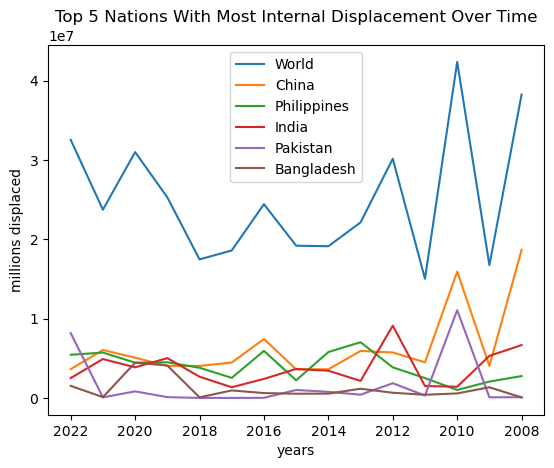

In [23]:
combined_df=world.merge(china, on ='date').merge(philippines, on='date').merge(india, on='date').merge(pakistan, on='date').merge(bangladesh, on='date') 
plot_countries=combined_df.plot(x='date', y=['World', 'China', 'Philippines', 'India', 'Pakistan', 'Bangladesh'], title= 'Top 5 Nations With Most Internal Displacement Over Time')
plot_countries.set(xlabel="years", ylabel="millions displaced")

#### From this graph, we see that 2010 had large increases in internally displaced people due to natural disasters overall in the world, followed by a corresponding spike in both China and Pakistan.

## Which percentage of these nations lives in exposure to droughts, floods, extreme temperatures?

#### Topic 46 covers Sustainable Development Goals

In [38]:
SOURCE=46
wbdata.get_indicator(source=SOURCE)

id                        name
------------------------  --------------------------------------------------------------------------------------------------------------------------------------------
AG.LND.FRST.K2            Forest area (sq. km)
AG.LND.FRST.ZS            Forest area (% of land area)
AG.YLD.CREL.KG            Cereal yield (kg per hectare)
BN.CAB.XOKA.GD.ZS         Current account balance (% of GDP)
BN.KLT.PTXL.CD            Portfolio Investment, net (BoP, current US$)
BX.KLT.DINV.CD.WD         Foreign direct investment, net inflows (BoP, current US$)
BX.KLT.DINV.WD.GD.ZS      Foreign direct investment, net inflows (% of GDP)
BX.TRF.PWKR.DT.GD.ZS      Personal remittances, received (% of GDP)
DT.DOD.DECT.GN.ZS         External debt stocks (% of GNI)
DT.ODA.ALLD.CD            Net official development assistance and official aid received (current US$)
DT.ODA.ODAT.CD            Net official development assistance received (current US$)
DT.ODA.ODAT.CD1           Net official 

In [40]:
drght_fld_xtremetemp= (wbdata.get_dataframe({'EN.CLC.MDAT.ZS':'Droughts, floods, extreme temperatures (% of population, average 1990-2009)'}).rename(columns = {'Droughts, floods, extreme temperatures (% of population, average 1990-2009)':'Droughts, floods, extreme temperatures (average % of population)'}).reset_index())
drght_fld_xtremetemp

,country,date,"Droughts, floods, extreme temperatures (average % of population)"
0,Africa Eastern and Southern,2022,NaN
1,Africa Eastern and Southern,2021,NaN
2,Africa Eastern and Southern,2020,NaN
3,Africa Eastern and Southern,2019,NaN
4,Africa Eastern and Southern,2018,NaN
...,...,...,...
16753,Zimbabwe,1964,NaN
16754,Zimbabwe,1963,NaN
16755,Zimbabwe,1962,NaN
16756,Zimbabwe,1961,NaN


#### Grouping by country, collecting average sum of % vulnerable population, and ranking from highest to lowest:

In [46]:
vulnerable=(drght_fld_xtremetemp.groupby(['country']).apply(sum)).drop(["country","date"], axis=1)
percent_vulnerable_sum=vulnerable.sort_values("Droughts, floods, extreme temperatures (average % of population)", ascending=False).reset_index()
percent_vulnerable_sum

,country,"Droughts, floods, extreme temperatures (average % of population)"
0,Eswatini,9.226586
1,Malawi,8.820493
2,China,7.950971
3,Niger,7.525066
4,Eritrea,7.323483
...,...,...
261,Latvia,0.000000
262,Least developed countries: UN classification,0.000000
263,Libya,0.000000
264,Liechtenstein,0.000000


## This function returns the index integer of any country input

In [48]:
def get_country_index(country_name):
    """Function returns index number of any country in data set"""

    risk= percent_vulnerable_sum.loc[percent_vulnerable_sum['country'] == country_name]
    return risk.index

In [49]:
get_country_index('China') #2
get_country_index('Philippines') #55
get_country_index('India') #14
get_country_index('Pakistan')#47
get_country_index('Bangladesh')#13

Int64Index([13], dtype='int64')

In [50]:
indexes=[2,55,14,47,13]
new_df_vulnerable=percent_vulnerable_sum.iloc[indexes]
new_df_vulnerable

,country,"Droughts, floods, extreme temperatures (average % of population)"
2,China,7.950971
55,Philippines,0.806385
14,India,4.356109
47,Pakistan,1.055342
13,Bangladesh,4.584694


## Bar chart of the population percentage of the top 5 nations with the highest internal displacement that is vulnerable to natural disasters and climate risk, specifically for droughts, floods, and extreme temperature

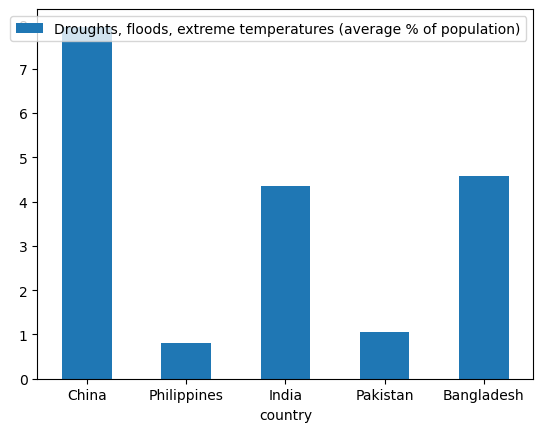

In [51]:
plot_data= pd.DataFrame({'Droughts, floods, extreme temperatures (average % of population)':['China', 'Philippines', 'India', 'Pakistan', 'Bangladesh'], 'val': [7.95,0.806,4.356,1.055,4.58]})
plot = new_df_vulnerable.plot.bar(x= 'country', y='Droughts, floods, extreme temperatures (average % of population)', rot=0)